Датасет (скачан с Kaggle и отредактирован автором): https://github.com/LoshkarevAnton/PythonProject/blob/ce391dba99f988e675e2c8504630afb19bb87e4c/FIFA%20World%20Cup%20Attendance%20Final%20upd.csv

### **Чемпионат мира по футболу 2022 в Катаре закончился совсем недавно, люди всё ещё продолжают обсуждать успех Аргентины и поздравлять её с победой. Но так ли успешен был этот чемпионат? Что если сравнить его с другими чемпионатами мира? Хорошим ли хозяином был Катар? На эти и многие другие вопросы нам предстоит ответить в ходе данного исследования.**

In [190]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from google.colab import files
import numpy as np

Давайте немного создадим классы

In [ ]:
class Cup():
      def __init__(self, id, year, country):
          self.id = id
          self.year = year
          self.country = country
    
class Num(Cup):
      def __init(self, id, year, country, total, aver):
          super().__init__(id, year, country)
          self.total = total
          self.aver = aver

class Desc(Cup):
      def __init__(self, id, year, country, venue, game):
          super().__init__(id, year, country)
          self.venue = venue
          self.game = game

class Geo(Cup):
      def __init__(self, id, year, country, lati, longi):
          super().__init__(id, year, country)
          self.lati = lati
          self.longi = longi

Подключаем файл с Диска

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Начинаем работать с данными

Проще всего лично для меня — pandas. Поэтому подключим именно его

In [ ]:
with open("/content/drive/MyDrive/FIFA World Cup Attendance Final upd.csv", encoding="windows-1251") as new_file:
    read_file = pd.read_csv(new_file, delimiter = ";")

df = read_file

df

,Id,Year,Hosts,Total,Matches,Average,Number,Venue,Games,Latitude,Longitude
0,1,1930,Uruguay,590549,18,32808,93000,"Estadio Centenario, Montevideo","Uruguay 6–1 Yugoslavia, Semi-final",-34.88333,-56.16667
1,2,1934,Italy,363000,17,21353,55000,"Stadio Nazionale PNF, Rome","Italy 2–1 Czechoslovakia, Final",41.90000,12.48333
2,3,1938,France,375700,18,20872,58455,"Olympique de Colombes, Paris","France 1–3 Italy, Quarter-final",48.85000,2.35000
3,4,1950,Brazil,1045246,22,47511,"173,850[86]","Maracan? Stadium, Rio de Janeiro","Brazil 1–2 Uruguay, Deciding match",-15.78333,-47.86667
4,5,1954,Switzerland,768607,26,29562,63000,"Wankdorf Stadium, Bern","West Germany 3–2 Hungary, Final",46.95000,7.45000
5,6,1958,Sweden,819810,35,23423,50928,"Ullevi Stadium, Gothenburg","Brazil 2–0 Soviet Union, Group stage",59.35000,18.06667
6,7,1962,Chile,893172,32,27912,68679,"Estadio Nacional, Santiago","Brazil 4–2 Chile, Semi-final",-33.43333,-70.66667
7,8,1966,England,1563135,32,48848,98270,"Wembley Stadium, London","England 4–2 West Germany, Final",51.50000,-0.11667
8,9,1970,Mexico,1603975,32,50124,108192,"Estadio Azteca, Mexico City","Mexico 1–0 Belgium, Group stage",19.43333,-99.13333
9,10,1974,West Germany,1865753,38,49099,83168,"Olympiastadion, Munich","West Germany 1–0 Chile, Group stage",50.73333,7.10000


Вот такой вид имеет наш датасет. Данные были скачаны с kaggle и отредактированы (добавлены поля Latitude и Longitude)

Некоторые значения повторяются. Для данного датасета это можно увидеть своими глазами, но лучше написать функцию, которая покажет нам, так ли это на самом деле

In [ ]:
df["is_duplicate"]= df.duplicated()

print("\n {}".format(df))


     Id  Year              Hosts    Total  Matches  Average       Number  \
0    1  1930            Uruguay   590549       18    32808        93000   
1    2  1934              Italy   363000       17    21353        55000   
2    3  1938             France   375700       18    20872        58455   
3    4  1950             Brazil  1045246       22    47511  173,850[86]   
4    5  1954        Switzerland   768607       26    29562        63000   
5    6  1958             Sweden   819810       35    23423        50928   
6    7  1962              Chile   893172       32    27912        68679   
7    8  1966            England  1563135       32    48848        98270   
8    9  1970             Mexico  1603975       32    50124       108192   
9   10  1974       West Germany  1865753       38    49099        83168   
10  11  1978          Argentina  1545791       38    40679        71712   
11  12  1982              Spain  2109723       52    40572        95500   
12  13  1986           

In [ ]:
df = df.drop(['is_duplicate'], axis = 1)

Данные проверены, более нам эта колонка не нужна

In [ ]:
df.sort_values(by=["Total"], ascending = False)

,Id,Year,Hosts,Total,Matches,Average,Number,Venue,Games,Latitude,Longitude
14,15,1994,United States,3587538,52,68991,94194,"Rose Bowl, Pasadena, California","Brazil 0–0 (3–2p) Italy, Final",38.88333,-77.01667
19,20,2014,Brazil,3429873,64,53592,74738,"Maracan? Stadium, Rio de Janeiro","Germany 1–0 Argentina, Final",-15.78333,-47.86667
21,22,2022,Qatar,3404252,64,53191,88966,"Lusail Stadium, Qatar","Argentina 3–3 (4–2p) France, Final",25.30000,51.51667
17,18,2006,Germany,3359439,64,52491,72000,"Olympiastadion, Berlin","Germany 1–1 (4–2p) Argentina, Quarter-final",52.51667,13.38333
18,19,2010,South Africa,3178856,64,49670,84490,"Soccer City, Johannesburg","Spain 1–0 Netherlands, Final",-33.92528,18.42389
20,21,2018,Russia,3031768,64,47371,78011,"Luzhniki Stadium, Moscow","France 4–2 Croatia, Final",55.75583,37.61722
15,16,1998,France,2785100,64,43517,80000,"Stade de France, Saint-Denis","Brazil 0–3 France, Final",48.85000,2.35000
16,17,2002,South Korea Japan,2705197,64,42269,69029,"International Stadium, Yokohama, Japan","Brazil 2–0 Germany, Final",36.44690,132.92415
13,14,1990,Italy,2516215,52,48389,74765,"San Siro, Milan","West Germany 4–1 Yugoslavia, Group stage",41.90000,12.48333
12,13,1986,Mexico,2394031,52,46039,114600,"Estadio Azteca, Mexico City","Mexico 1–1 Paraguay, Group stageArgentina 3–2 ...",19.43333,-99.13333


Больше всего болельщиков было на Чемпионате Мира в США в 1994 году. Но это, как говорится, Total. Может быть, среднее количество болельщиков на матче покажет другой результат?

In [ ]:
df.sort_values(by=["Average"], ascending = False)

,Id,Year,Hosts,Total,Matches,Average,Number,Venue,Games,Latitude,Longitude
14,15,1994,United States,3587538,52,68991,94194,"Rose Bowl, Pasadena, California","Brazil 0–0 (3–2p) Italy, Final",38.88333,-77.01667
19,20,2014,Brazil,3429873,64,53592,74738,"Maracan? Stadium, Rio de Janeiro","Germany 1–0 Argentina, Final",-15.78333,-47.86667
21,22,2022,Qatar,3404252,64,53191,88966,"Lusail Stadium, Qatar","Argentina 3–3 (4–2p) France, Final",25.30000,51.51667
17,18,2006,Germany,3359439,64,52491,72000,"Olympiastadion, Berlin","Germany 1–1 (4–2p) Argentina, Quarter-final",52.51667,13.38333
8,9,1970,Mexico,1603975,32,50124,108192,"Estadio Azteca, Mexico City","Mexico 1–0 Belgium, Group stage",19.43333,-99.13333
18,19,2010,South Africa,3178856,64,49670,84490,"Soccer City, Johannesburg","Spain 1–0 Netherlands, Final",-33.92528,18.42389
9,10,1974,West Germany,1865753,38,49099,83168,"Olympiastadion, Munich","West Germany 1–0 Chile, Group stage",50.73333,7.10000
7,8,1966,England,1563135,32,48848,98270,"Wembley Stadium, London","England 4–2 West Germany, Final",51.50000,-0.11667
13,14,1990,Italy,2516215,52,48389,74765,"San Siro, Milan","West Germany 4–1 Yugoslavia, Group stage",41.90000,12.48333
3,4,1950,Brazil,1045246,22,47511,"173,850[86]","Maracan? Stadium, Rio de Janeiro","Brazil 1–2 Uruguay, Deciding match",-15.78333,-47.86667


Перемены видны только с 5-го места. 1 — 4 места остались ровно такими, какими они и были. Но ничего, хотя бы проверили

Каждый раз ЧМ проводится по-разному, ввиду разных составов гостей, то есть, не всегда количество команд на ЧМ одинаковое. От этого зависит количество матчей. Давайте посмотрим на наибольшее количество матчей, быть может, есть какая-то тенденция?

In [ ]:
df.sort_values(by=["Matches", "Id"], ascending = False)

,Id,Year,Hosts,Total,Matches,Average,Number,Venue,Games,Latitude,Longitude
21,22,2022,Qatar,3404252,64,53191,88966,"Lusail Stadium, Qatar","Argentina 3–3 (4–2p) France, Final",25.30000,51.51667
20,21,2018,Russia,3031768,64,47371,78011,"Luzhniki Stadium, Moscow","France 4–2 Croatia, Final",55.75583,37.61722
19,20,2014,Brazil,3429873,64,53592,74738,"Maracan? Stadium, Rio de Janeiro","Germany 1–0 Argentina, Final",-15.78333,-47.86667
18,19,2010,South Africa,3178856,64,49670,84490,"Soccer City, Johannesburg","Spain 1–0 Netherlands, Final",-33.92528,18.42389
17,18,2006,Germany,3359439,64,52491,72000,"Olympiastadion, Berlin","Germany 1–1 (4–2p) Argentina, Quarter-final",52.51667,13.38333
16,17,2002,South Korea Japan,2705197,64,42269,69029,"International Stadium, Yokohama, Japan","Brazil 2–0 Germany, Final",36.44690,132.92415
15,16,1998,France,2785100,64,43517,80000,"Stade de France, Saint-Denis","Brazil 0–3 France, Final",48.85000,2.35000
14,15,1994,United States,3587538,52,68991,94194,"Rose Bowl, Pasadena, California","Brazil 0–0 (3–2p) Italy, Final",38.88333,-77.01667
13,14,1990,Italy,2516215,52,48389,74765,"San Siro, Milan","West Germany 4–1 Yugoslavia, Group stage",41.90000,12.48333
12,13,1986,Mexico,2394031,52,46039,114600,"Estadio Azteca, Mexico City","Mexico 1–1 Paraguay, Group stageArgentina 3–2 ...",19.43333,-99.13333


Действительно, тенденция показывает, что с 1974 года количество матчей каждый следующий ЧМ или растёт, или остаётся таким же. То есть, каждый новый Чемпионат Мира не играется меньшее количество матчей, чем это было на прошлом Чемпионате.

Давайте посмотрим, какое количество болельщиков действительно приходило на стадионы в разные года

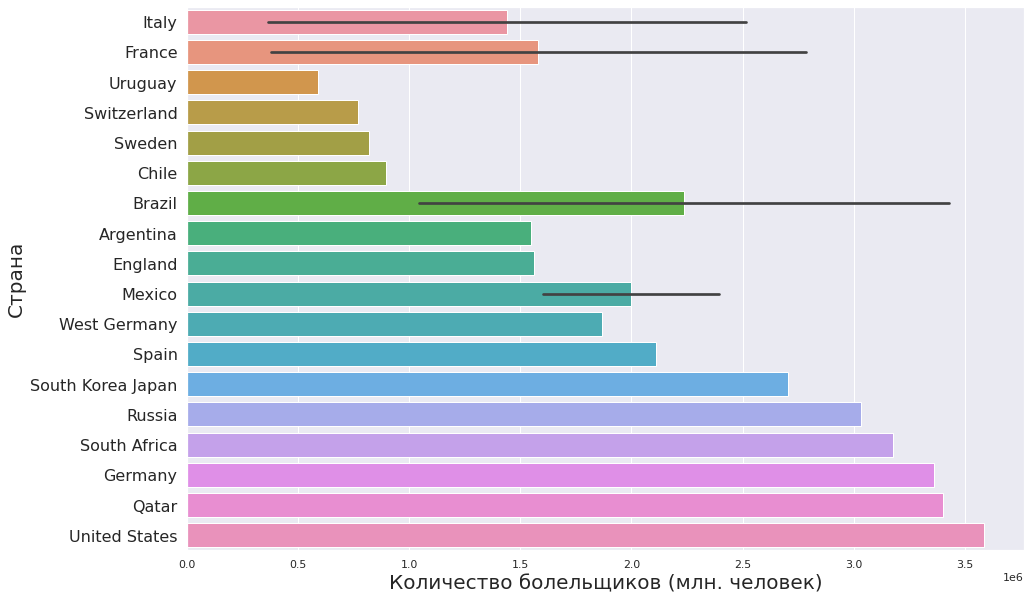

In [162]:
fig , ax = plt.subplots(figsize=(15,10))
max_total = df.sort_values(by=["Total"], ascending = True)
sns.barplot(data = max_total, y = "Hosts", x = "Total")
ax.set_yticklabels(ax.get_yticklabels() , fontsize = 16)

ax.set_xlabel("Количество болельщиков (млн. человек)", fontsize = 20)
ax.set_ylabel("Страна", fontsize = 20)

plt.show()

График выше показывает, какое количество людей посетило ЧМ в перечисленных странах. Чёрные линии — работают только для дублирующихся стран, и, соответственно, показывают, какое количество людей посетило турнир, проходивший в стране во второй раз. То есть, первое число — отмечено цветом и кончается там, где начинается чёрная линия. Линия включает в себя всё, что было до неё и заканчивается на количестве болельщиков во второй раз. Итоговый столбец (определённого цвета) демонстрирует среднее из двух чисел.

Например, Бразилия: В первый раз — 1 045 246 человек (начало тёмной линии). Второй раз — 3 429 873 (конец тёмной линии). Среднее из них (n1 + n2) / 2 = 2 237 560 (весь зелёный отрезок на графике)	

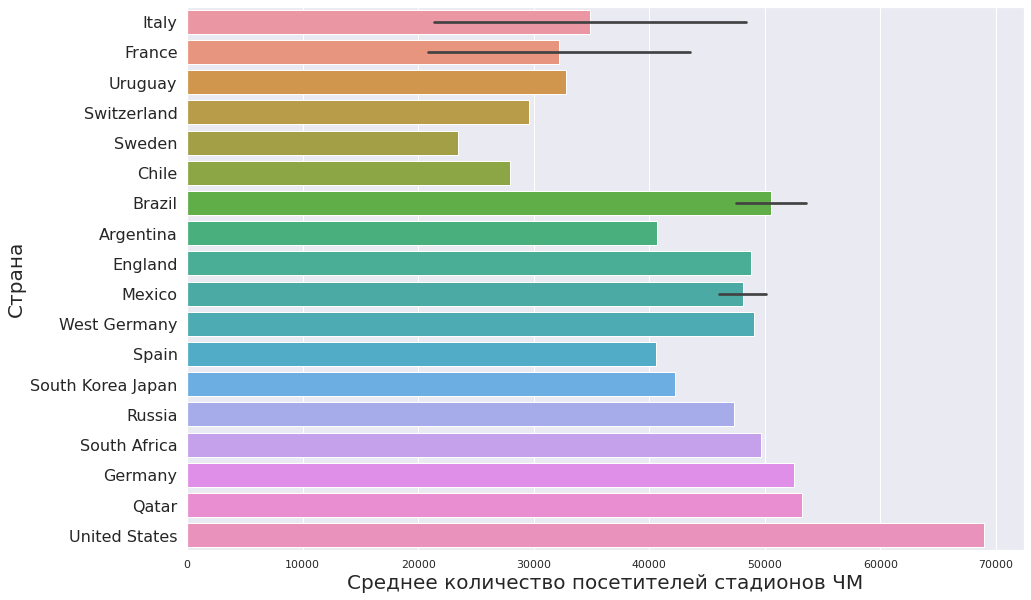

In [163]:
fig , ax = plt.subplots(figsize=(15,10))
max_average = df.sort_values(by=["Total"], ascending = True)
sns.barplot(data = max_average, y = "Hosts", x = "Average")
ax.set_yticklabels(ax.get_yticklabels() , fontsize = 16)
ax.set_xlabel("Среднее количество посетителей стадионов ЧМ", fontsize = 20)
ax.set_ylabel("Страна", fontsize = 20)
plt.show()

Этот график, скорее, некоректен, потому что сложно считать среднее количество человек, беря в расчёт два абсолютно разных события, учитывая разницу в населении Земли в принципе и в доступности авиабилетов. Но тем не менее, пусть такой график тоже присутствует.

Тёмные линии означают то же самое, что и на предыдущем графике.

И небольшой piece-of-art напоследок. Вот тут можно рассмотреть все страны, которые принимали у себя чемпионат мира. В случае, если страна принимала его не единожды, на месте точке стоит кластер. При нажатии на него, выдаются все Чемпионаты Мира, которые проходили в стране. Можно нажать на каждый и рассмотреть его. Каждый маркер на карте кликабелен, вылезает подсказка о том, что это за страна, в каком году проходил турнир и сколько человек было на ЧМ в том году, когда она его принимала. Размер точки зависит от количества болельщиков на турнире в том году.

In [200]:
lat = df["Latitude"]
lon = df["Longitude"]
attend = df["Total"]
host = df["Hosts"]
hostyear = df["Year"]

map = folium.Map(zoom_start = 5, tiles = "CartoDB dark_matter")

def size_change(attend):
    if(attend < 1000000):
        return("8")
    elif(1000000 <= attend <2000000):
        return("12")
    else:
        return("16")

marker_cluster = MarkerCluster().add_to(map)

for lat, lon, attend, host, hostyear in zip(lat, lon, attend, host, hostyear):
    folium.CircleMarker(location=[lat, lon], radius = size_change(attend), popup = str(host) + " " + str(hostyear) + ". Total attendants: " + str(attend), icon=folium.Icon(color = 'gray'), fill_color = "green").add_to(marker_cluster)

map.save("World Cup map.html")

map